A/B testing dataset: https://www.kaggle.com/datasets/zhangluyuan/ab-testing?select=ab_data.csv

The task is to determine whether the new page generates more conversions than the old page
- H0: m0 = m1
- H1: m0 < m1

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms

### Data Prepation

In [27]:
df = pd.read_csv('ab_data.csv')
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [28]:
#drop duplicates
df.drop_duplicates(subset=['user_id'], inplace=True)
len(df)

290584

In [29]:
df.groupby(['landing_page','group'])\
    .agg({'group':'count'})

group
landing_page group            
new_page     control      1006
             treatment  144314
old_page     control    144226
             treatment    1038

by the mistake control group has new_page views and treatment has old_page

In [38]:
mistake = df.loc[((df['group'] == 'control') & (df['landing_page'] == 'new_page'))|
                    ((df['group'] == 'treatment') & (df['landing_page'] == 'old_page'))]

df = df[~df['user_id'].isin(mistake['user_id'])]

0    254057
1     34483
Name: converted, dtype: int64


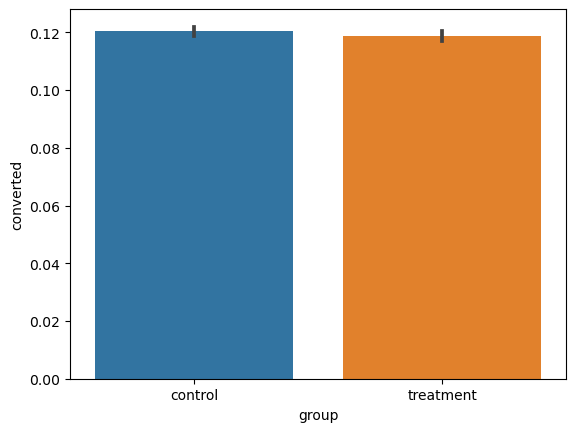

In [40]:
print(df.converted.value_counts())
sns.barplot(data=df,x='group',y='converted');

In [49]:
gr = df.groupby(['group'])\
    .agg({'converted':'sum',
         'group':'count'})
gr['conversion'] = gr['converted'] / gr['group']
gr

,converted,group,conversion
group,,,
control,17349,144226,0.120290
treatment,17134,144314,0.118727


In [42]:
control = df.loc[df['group']=='control']
treatment = df.loc[df['group']=='treatment']

### T-test

In [64]:
stats.ttest_ind(a=treatment['converted'], b=control['converted'], random_state=42, alternative='greater')

Ttest_indResult(statistic=-1.2942360603357457, pvalue=0.9022075348163459)

The probability of making an error of the first type (p-value) is  0.90. We can firmly reject the alternative hypothesis that the new page makes more conversions.

In [76]:
def conf_int(x, name):
    print(f'{name} confidence interval:{stats.t.interval(confidence=0.95, loc=np.mean(x), df=len(x)-1, scale=stats.sem(x))}, mean:{x.mean()}')
    
conf_int(x=control['converted'], name='control')
conf_int(x=treatment['converted'], name='treatment')

control confidence interval:(0.11861150950190608, 0.12196924570173265), mean:0.12029037760181936
treatment confidence interval:(0.11705832358357807, 0.12039611604112918), mean:0.11872721981235362
